#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [339]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

#**Ejercicio-1.** 

In [340]:
data = pd.read_csv('data/Facebook_metrics/dataset_Facebook.csv', sep= ';', header= 0)
data = data.rename(columns= {'Lifetime People who have liked your Page and engaged with your post':'LPE'})
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


#**Ejercicio-2.**

In [341]:
print(data.shape)
X = data.drop('LPE', axis=1)
y = data['LPE']

(500, 19)


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5, random_state= 42)
print(X_test.shape)

(100, 18)


#**Ejercicio-3.**

In [343]:
def mi_RMSE(y_real, y_pred):
    result = np.sqrt(np.mean((y_real - y_pred) ** 2))
    return result

def mi_MAE(y_real, y_pred):
    result = np.mean(np.abs(y_real - y_pred))
    return result

def mi_MAPE(y_real, y_pred):
    result = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    return result

In [344]:
def metricas_regresion(y_real, y_pred, name):
    tabla = pd.DataFrame(index = ['RMSE', 'MAE', 'MAPE'],
                        data= [mi_RMSE(y_real, y_pred), mi_MAE(y_real, y_pred), mi_MAPE(y_real, y_pred)], columns= [name])
    return tabla

#**Ejercicio-4.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

array([[<AxesSubplot: title={'center': 'Page total likes'}>,
        <AxesSubplot: title={'center': 'Category'}>,
        <AxesSubplot: title={'center': 'Post Month'}>,
        <AxesSubplot: title={'center': 'Post Weekday'}>],
       [<AxesSubplot: title={'center': 'Post Hour'}>,
        <AxesSubplot: title={'center': 'Paid'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Total Reach'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Total Impressions'}>],
       [<AxesSubplot: title={'center': 'Lifetime Engaged Users'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Consumers'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Consumptions'}>,
        <AxesSubplot: title={'center': 'Lifetime Post Impressions by people who have liked your Page'}>],
       [<AxesSubplot: title={'center': 'Lifetime Post reach by people who like your Page'}>,
        <AxesSubplot: title={'center': 'comment'}>,
        <AxesSubplot: title={'center': 'like'}>,
        <AxesSubp

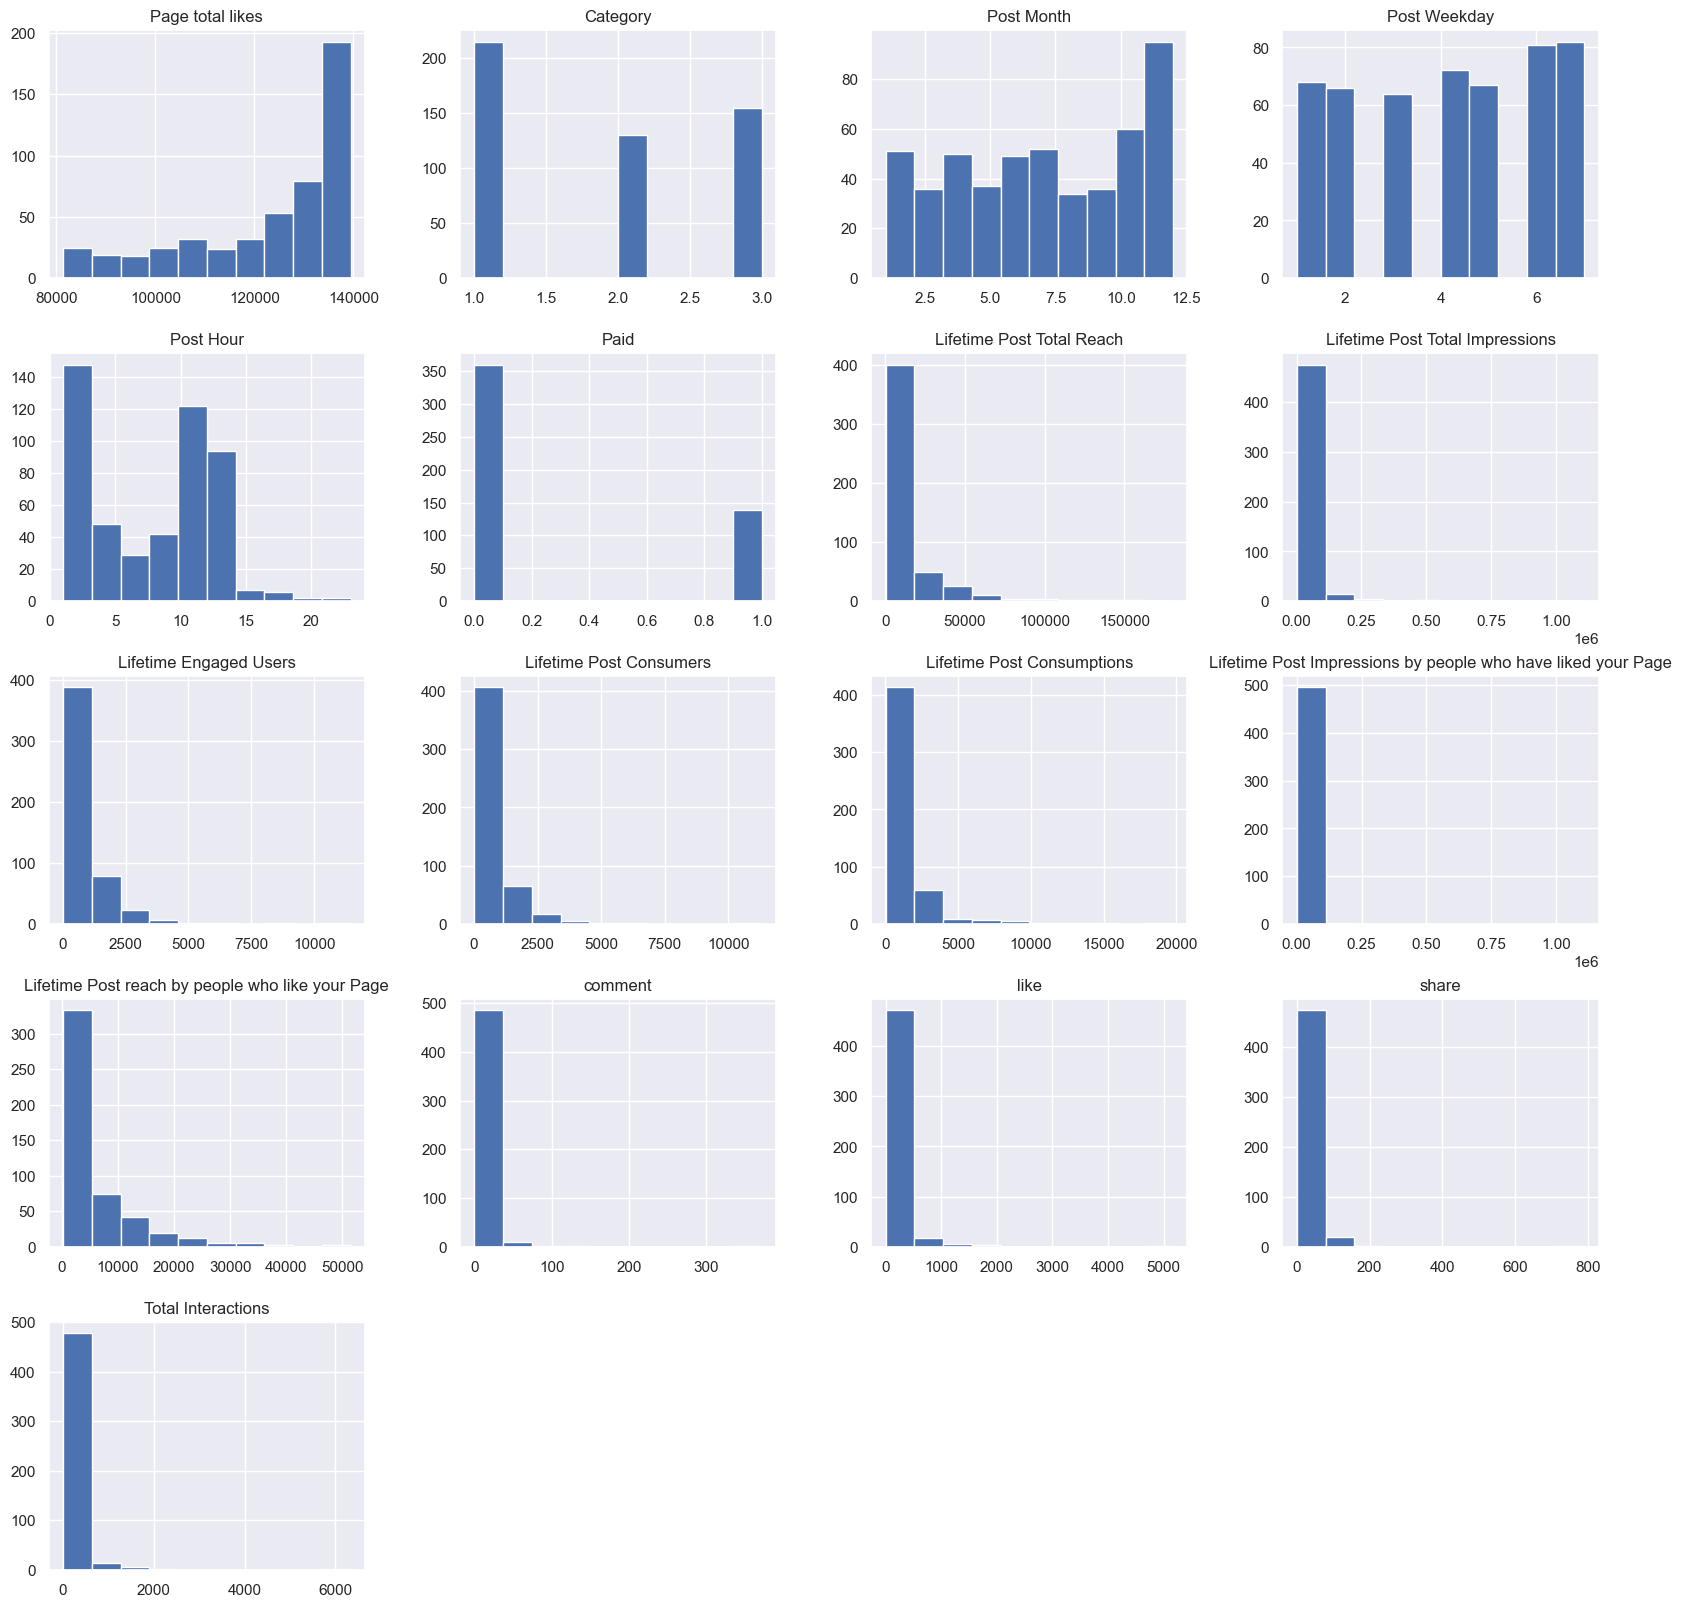

In [345]:
print(X.info())
X.hist(figsize=(20,20))

In [346]:
X.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page', 'comment', 'like',
       'share', 'Total Interactions'],
      dtype='object')

In [347]:
from math import remainder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


cat_pipe = Pipeline(steps= [('Encoder',OneHotEncoder())])
cat_col = ['Type', 'Category', 'Paid']
column_transformer = ColumnTransformer(transformers=[('categoricas', cat_pipe, cat_col)])



#**Ejercicio-5.**

In [348]:
Xtt, Xtv, ytt, ytv = train_test_split(X_train, y_train, test_size= 100/len(y_train), random_state= 42)
print(Xtt.shape)
print(Xtv.shape)

(300, 18)
(100, 18)


In [349]:
dummy_model = DummyRegressor()
dummy_model.fit(Xtt, ytt)

y_pred_tt  = dummy_model.predict(Xtt)
y_pred_tv  = dummy_model.predict(Xtv)
metricas_regresion(ytt, y_pred_tt, 'Entrenamiento').join(metricas_regresion(ytv, y_pred_tv, 'Validación'))


,Entrenamiento,Validación
RMSE,595.732592,653.012911
MAE,371.199600,414.723867
MAPE,133.628792,153.990739


#**Ejercicio-6.**

In [352]:
modelos = [LinearRegression(), RandomForestRegressor(), MLPRegressor(max_iter=10000)]
nombres = ['Regresión Lineal', 'Bosque Aleatorio', 'Perceptrón Multicapa']
metricas = {'RMSE':make_scorer(mi_RMSE), 'MAE':make_scorer(mi_MAE), 'MAPE':make_scorer(mi_MAPE)}

restultados = []

for model, name in zip(modelos, nombres):
    pipe = make_pipeline(column_transformer, model)
    
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state= 42)
    cv_model = cross_validate(pipe,
        X = X_train,
        y = y_train,
        cv = cv,
        scoring= metricas,
        return_train_score= True,
        error_score= 0,
        n_jobs= -1
    )
    
    restultados.append(cv_model)
    # print(f'Para el modelo de {name} sus valores son:')
    print(pd.DataFrame(index= cv_model.keys(),data= [np.mean(x) for x in cv_model.values()], columns= [name]))


            Regresión Lineal
fit_time            0.010132
score_time          0.020020
test_RMSE         398.278058
train_RMSE        491.674568
test_MAE          247.885000
train_MAE         304.247500
test_MAPE          78.320566
train_MAPE        110.736643
            Bosque Aleatorio
fit_time            0.154009
score_time          0.019766
test_RMSE         410.681191
train_RMSE        482.546937
test_MAE          254.169469
train_MAE         300.476571
test_MAPE          81.978640
train_MAPE        112.049504
            Perceptrón Multicapa
fit_time                5.179411
score_time              0.028735
test_RMSE             398.565057
train_RMSE            489.891445
test_MAE              247.914800
train_MAE             302.572485
test_MAPE              79.749597
train_MAPE            111.002133


### Conculsiones sobre el ejercicio 6

Se puede ver 

#**Ejercicio-7.**

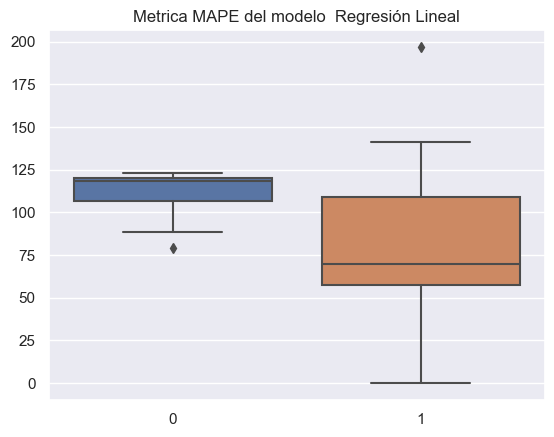

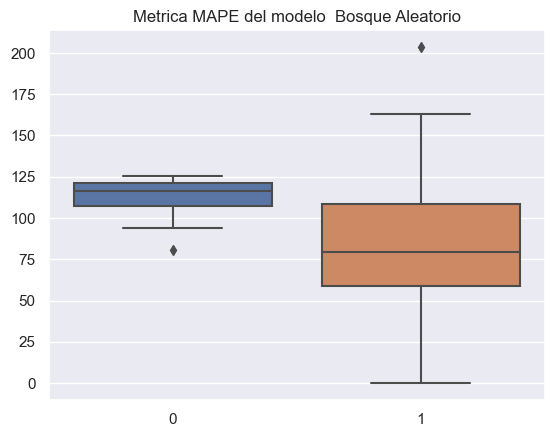

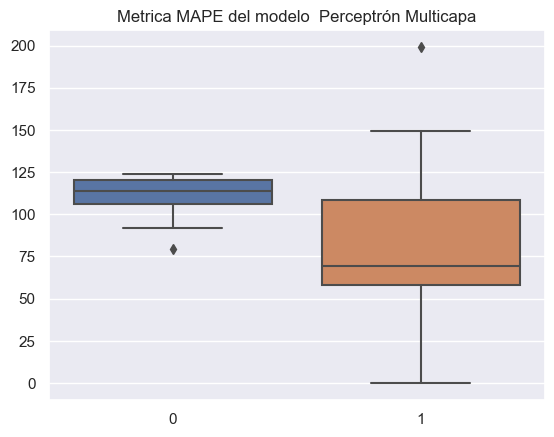

In [384]:
train_list = [f'train_{x}' for x in metricas.keys()]
test_list = [f'test_{x}' for x in metricas.keys()]
for i in range(len(restultados)):
    sns.boxplot([restultados[i]['train_MAPE'], restultados[i]['test_MAPE']])

    plt.title(f'Metrica MAPE del modelo  {nombres[i]}')
    
    plt.show()

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**